<a href="https://colab.research.google.com/github/Avonna/Avona/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование и визуализация данных: объявления о продаже квартир

### Общее описание проекта

В нашем распоряжении [данные](https://drive.google.com/file/d/1-A73wppikZtJLQsHHjrLqOhGYE40BkGP/view?usp=sharing) сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.


### Описание данных
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

|Признак|Описание признака|
|-------------:|:------------|
|**airports_nearest**|расстояние до ближайшего аэропорта в метрах (м)|
|**balcony**|число балконов|
|**ceiling_height**|высота потолков (м)|
|**cityCenters_nearest**|расстояние до центра города (м)|
|**days_exposition**| сколько дней было размещено объявление (от публикации до снятия)|
|**first_day_exposition**|дата публикации|
|**floor**|этаж|
|**floors_total**| всего этажей в доме|
|**is_apartment**|апартаменты (булев тип)|
|**kitchen_area**|площадь кухни в квадратных метрах (м²)|
|**last_price**|цена на момент снятия с публикации|
|**living_area**|жилая площадь в квадратных метрах(м²)|
|**locality_name**|название населённого пункта|
|**open_plan**|свободная планировка (булев тип)|
|**parks_around3000**|число парков в радиусе 3 км|
|**parks_nearest**|расстояние до ближайшего парка (м)|
|**ponds_around3000**|число водоёмов в радиусе 3 км|
|**ponds_nearest**|расстояние до ближайшего водоёма (м)|
|**rooms**|число комнат|
|**studio**|квартира-студия (булев тип)|
|**total_area**|площадь квартиры в квадратных метрах (м²)|
|**total_images**|число фотографий квартиры в объявлении|

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

### Скачиваем файл
URL https://drive.google.com/file/d/1-A73wppikZtJLQsHHjrLqOhGYE40BkGP/view?usp=sharing

In [ ]:
! gdown --fuzzy 'https://drive.google.com/file/d/1-A73wppikZtJLQsHHjrLqOhGYE40BkGP/view?usp=sharing'

Downloading...
From: https://drive.google.com/uc?id=1-A73wppikZtJLQsHHjrLqOhGYE40BkGP
To: /content/real_estate_data.csv
100% 3.21M/3.21M [00:00<00:00, 124MB/s]


### Открываем файл

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Изучаем общую информацию

In [ ]:
total_rows = len(df)
total_rows

23699

In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод по шагу 1

Датасет содержит `23699` строк. Всего в таблице 22 столбца.Из них: 2 столбца имеют логический тип, 3 столбца - целочисленный, 14 столбцов - вещественный и 3 столбца - строковый.

Логический  тип:
1. `studio` — квартира-студия (булев тип)
2. `open_plan` — свободная планировка (булев тип)

Целочисленный тип:
1. `total_images` — число фотографий квартиры в объявлении
2. `rooms` — число комнат
3. `floor` — этаж

Вещественный тип:
1. `last_price` — цена на момент снятия с публикации
2. `total_area` — площадь квартиры в квадратных метрах (м²)
3. `ceiling_height` — высота потолков (м)
4. `floors_total` — всего этажей в доме
5. `living_area` — жилая площадь в квадратных метрах(м²)
6. `kitchen_area` — площадь кухни в квадратных метрах (м²)
7. `balcony` — число балконов
8. `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
9. `cityCenters_nearest` — расстояние до центра города (м)
10. `parks_around3000` — число парков в радиусе 3 км
11. `parks_nearest` — расстояние до ближайшего парка (м)
12. `ponds_around3000` — число водоёмов в радиусе 3 км
13. `ponds_nearest` — расстояние до ближайшего водоёма (м)
14. `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

Строковый тип:
1. `first_day_exposition` — дата публикации
2. `is_apartment` — апартаменты (булев тип)
3. `locality_name` — название населённого пункта

В переменных `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` есть пропуски. Для следующих переменных обнаружены аномальные значения:
* `ceiling_height`  - минимальное значение - 1 м, максимальное - 100 м;
* `airports_nearest` - минимальное значение 0;
* `cityCenters_nearest` - максимальное значение 65968 м.

Необходимо изменить типы данных для следующих переменных: `is_apartment` - на логический, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` - на целочисленный.

## Шаг 2. Предобработка данных

### Считаем пропуски
Посчитаем количество пропусков в переменных.

In [ ]:
def get_null_info(df):
    """Функция позволяет получить информацию о количестве пропусков в таблице.
       
       Параметр: датафрейм с данными.
       
       Возвращаемое значение: датафрейм с информацией о количестве пропусков и их доле в каждом столбце таблицы.
    """
    return pd.concat([df.isnull().sum(), df.isnull().mean()], keys=['sum', 'mean'], axis=1)

In [ ]:
get_null_info(df)

,sum,mean
total_images,0,0.000000
last_price,0,0.000000
total_area,0,0.000000
first_day_exposition,0,0.000000
rooms,0,0.000000
ceiling_height,9195,0.387991
floors_total,86,0.003629
living_area,1903,0.080299
floor,0,0.000000
is_apartment,20924,0.882906


### Предобработка ceiling_height
В переменной `ceiling_height` пропущено 9195 значений.

In [ ]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Здесь имеются аномальные значения: минимальное 1 м, максимальное 100 м. Заменим пропуски медианным значением.

In [ ]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

0

### Предобработка floors_total
В переменной `floors_total` пропущено 86 значений. Очевидно, что `floors_total` не может быть меньше `floor`.

In [ ]:
df[['floors_total', 'floor']].describe()

,floors_total,floor
count,23613.000000,23699.000000
mean,10.673824,5.892358
std,6.597173,4.885249
min,1.000000,1.000000
25%,5.000000,2.000000
50%,9.000000,4.000000
75%,16.000000,8.000000
max,60.000000,33.000000


In [ ]:
df[df['floors_total'].isnull()]['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
21     4
5      4
7      4
3      4
19     3
11     3
13     3
1      3
18     3
15     3
10     3
24     2
2      2
20     2
14     2
22     1
17     1
23     1
Name: floor, dtype: int64

Заменим пропущенные значения в переменной `floors_total` на значения переменной `floor`.

In [ ]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])
df['floors_total'].isna().sum()

0

Заменим тип переменной `floors_total` на целочисленный.

In [ ]:
df['floors_total'] = df['floors_total'].astype('int')

### Предобработка living_area и kitchen_area
В переменной `living_area` пропущено 1903 значения. Очевидно, что эти значения должны быть связаны с `total_area` и `kitchen_area`. В переменной `total_area` пропусков нет, а в переменной `kitchen_area` 2278 пропуска.

In [ ]:
df[['living_area', 'total_area', 'kitchen_area']].describe()

,living_area,total_area,kitchen_area
count,21796.000000,23699.000000,21421.000000
mean,34.457852,60.348651,10.569807
std,22.030445,35.654083,5.905438
min,2.000000,12.000000,1.300000
25%,18.600000,40.000000,7.000000
50%,30.000000,52.000000,9.100000
75%,42.300000,69.900000,12.000000
max,409.700000,900.000000,112.000000


Посмотрим информацию о кухне в квартирах свободной планировки и студиях.

In [ ]:
df[df.studio][['living_area', 'total_area', 'kitchen_area']].describe()

,living_area,total_area,kitchen_area
count,139.000000,149.000000,0.0
mean,18.995396,27.783154,NaN
std,7.345598,9.310360,NaN
min,2.000000,15.500000,NaN
25%,16.000000,24.000000,NaN
50%,18.000000,26.000000,NaN
75%,19.850000,29.000000,NaN
max,68.000000,98.400000,NaN


In [ ]:
df[df.open_plan][['living_area', 'total_area', 'kitchen_area']].describe()

,living_area,total_area,kitchen_area
count,62.000000,67.000000,0.0
mean,20.553226,36.990000,NaN
std,8.755602,45.723431,NaN
min,10.500000,16.000000,NaN
25%,17.000000,25.000000,NaN
50%,18.050000,27.100000,NaN
75%,21.050000,30.750000,NaN
max,71.300000,371.000000,NaN


Информации о кухне нет, поэтому заменим  в таких квартирах её площадь на 0.

In [ ]:
df['kitchen_area'].isna().sum()

2278

In [ ]:
len(df[(df.studio | df.open_plan)])

216

In [ ]:
df['kitchen_area'] = df['kitchen_area'].fillna(df[(df.studio | df.open_plan)]['kitchen_area'].fillna(0))

In [ ]:
df['kitchen_area'].isna().sum()

2062

Оставшиеся пропуски  в переменных `kitchen_area` и `living_area` заполним в зависимости от количества комнат на основании значений `total_area`.

In [ ]:
df['living_coef'] = df['living_area']/df['total_area']

In [ ]:
living_k = df.groupby('rooms')['living_coef'].median()
living_k

rooms
0     0.689655
1     0.482488
2     0.585009
3     0.631667
4     0.659740
5     0.651842
6     0.679412
7     0.681670
8     0.688475
9     0.628251
10    0.653103
11    0.710093
12    0.455222
14    0.648695
15    0.693220
16    0.666667
19    0.706086
Name: living_coef, dtype: float64

In [ ]:
for room_num in living_k.index:
    df.loc[(df['living_area'].isnull()) & (df['rooms'] == room_num) , 'living_area'] = (
        df.loc[(df['living_area'].isnull()) & (df['rooms'] == room_num) , 'total_area'] * living_k[room_num])

In [ ]:
df['kitchen_coef'] = df['kitchen_area']/df['total_area']

In [ ]:
kitchen_k = df.groupby('rooms')['kitchen_coef'].median()
kitchen_k

rooms
0     0.000000
1     0.247678
2     0.161074
3     0.128553
4     0.112245
5     0.105325
6     0.099502
7     0.083717
8     0.109170
9     0.049620
10    0.091624
11    0.066855
12    0.124444
14    0.075636
15    0.169492
16    0.048148
19    0.073679
Name: kitchen_coef, dtype: float64

In [ ]:
for room_num in kitchen_k.index:
    df.loc[(df['kitchen_area'].isnull()) & (df['rooms'] == room_num) , 'kitchen_area'] = (
        df.loc[(df['kitchen_area'].isnull()) & (df['rooms'] == room_num) , 'total_area'] * kitchen_k[room_num])

In [ ]:
df[['living_area', 'total_area', 'kitchen_area']].describe()

,living_area,total_area,kitchen_area
count,23699.000000,23699.000000,23699.000000
mean,34.693060,60.348651,10.395686
std,22.836079,35.654083,5.863654
min,2.000000,12.000000,0.000000
25%,18.700000,40.000000,7.000000
50%,30.000000,52.000000,9.000000
75%,42.400000,69.900000,11.780000
max,430.133948,900.000000,122.377709


Удалим вспомогательные переменные `living_coef` и `kitchen_coef`.

In [ ]:
df.drop(columns=['living_coef', 'kitchen_coef'], inplace=True)

In [ ]:
df['living_area'].isna().sum()

0

In [ ]:
df['kitchen_area'].isna().sum()

0

### Предобработка is_apartment
Логично заполнить пропуски в переменной `is_apartment` на False.

In [ ]:
df['is_apartment'].fillna(False, inplace=True)
df['is_apartment'].isna().sum()

0

Приведём значения переменной `is_apartment` к логическому типу.

In [ ]:
df['is_apartment'].unique()

array([False,  True])

In [ ]:
df['is_apartment'] = df['is_apartment'].astype('bool')

### Предобработка balcony
В задании сказано, что в переменной `balcony` пропуски можно заполнить нулями.

In [ ]:
df['balcony'].fillna(0, inplace=True)
df['balcony'].isna().sum()

0

Заменим тип переменной `balcony` на целочисленный.

In [ ]:
df['balcony'] = df['balcony'].astype('int')

In [ ]:
df['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

### Предобработка locality_name
В переменной `locality_name` всего 49 пропусков. Посмотрим населённые пункты.

In [ ]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Можно выделить два варианта написания слова 'поселок'/'посёлок'. Так как по правилам русского языка надо писать 'посёлок' выполним замену.

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')
df['locality_name'].value_counts()

Санкт-Петербург                     15721
посёлок Мурино                        556
посёлок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
посёлок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
посёлок Дзержинского                    1
Name: locality_name, Length: 330, dtype: int64

В названии некоторых населенных пунктов имеются синонимы:

поселок  => городской поселок, городского типа, городской, коттеджный;

деревня => село;

садовое товарищество => садоводческое некоммерческое товарищество.

Проведём замену.

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('городской ', '')
df['locality_name'] = df['locality_name'].str.replace(' городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный ', '')
df['locality_name'] = df['locality_name'].str.replace(' при железнодорожной', '')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое', 'садовое')
df['locality_name'] = df['locality_name'].str.replace('село ', 'деревня ')
df['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       556
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
деревня Пельгора                       1
посёлок Каложицы                       1
посёлок Платформа 69-й километр        1
посёлок Почап                          1
посёлок Дзержинского                   1
Name: locality_name, Length: 319, dtype: int64

Из 330 названий осталось 319. 

Пропуски заполним модой.

In [ ]:
locality_name_mode = df['locality_name'].mode()[0]

In [ ]:
df['locality_name'].fillna(locality_name_mode, inplace=True)
df['locality_name'].isna().sum()

0

### Предобработка airports_nearest
В переменной `airports_nearest` 5542 пропуска.

In [ ]:
df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Минимальное значение 0. Найдём количество квартир в радиусе 1000 м.

In [ ]:
df[df.airports_nearest < 1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9,19.8,3,False,...,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Всего 1 квартира в Санкт-Петербурге. Заменим для неё медианное значение для этого города.

In [ ]:
df.loc[df.airports_nearest < 1000, 'airports_nearest'] = df[df['locality_name']=='Санкт-Петербург']['airports_nearest'].median()

Пропущенное значение в переменной `airports_nearest` означает значительную удалённость от аэропорта, поэтому заменим пропуски максимальным значением.

In [ ]:
df['airports_nearest'].fillna(df['airports_nearest'].max(), inplace=True)
df['airports_nearest'].isna().sum()

0

### Предобработка cityCenters_nearest
В переменной `cityCenters_nearest` 5519 пропусков.

In [ ]:
df['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Заполним пропуски средним значением для данного населённого пункта.

In [ ]:
df['cityCenters_nearest'] = df.groupby('locality_name')['cityCenters_nearest'].transform(lambda x: x.fillna(x.mean()))
df['cityCenters_nearest'].isna().sum()

4864

Посмотрим в каких населённых пунктах остались пропуски.

In [ ]:
df[df['cityCenters_nearest'].isna()]['locality_name'].value_counts()

Всеволожск                         398
Гатчина                            307
деревня Кудрово                    299
Выборг                             237
Кудрово                            173
                                  ... 
деревня Пельгора                     1
посёлок Каложицы                     1
посёлок Платформа 69-й километр      1
посёлок Почап                        1
посёлок Дзержинского                 1
Name: locality_name, Length: 292, dtype: int64

Заполним пропуски максимальным расстоянием до центра.

In [ ]:
df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].max(), inplace=True)
df['cityCenters_nearest'].isna().sum()

0

### Предобработка parks_around3000 и parks_nearest

В переменных `parks_around3000` и `ponds_around3000` по 5518 пропусков.

In [ ]:
len(df[df['parks_around3000'].isna()&df['ponds_around3000'].isna()])

5518

Пропуски в одних и тех же строках, поэтому будем обрабатывать их единообразно. Между значениями переменных `parks_around3000` и `parks_nearest` должна быть связь - если заполнена одна из этих переменных, то должна быть заполнена и вторая.

In [ ]:
df[['parks_around3000', 'parks_nearest']].describe()

,parks_around3000,parks_nearest
count,18181.000000,8079.000000
mean,0.611408,490.804555
std,0.802074,342.317995
min,0.000000,1.000000
25%,0.000000,288.000000
50%,0.000000,455.000000
75%,1.000000,612.000000
max,3.000000,3190.000000


Видим, что в переменной `parks_nearest` гораздо больше пропусков. Для большинства записей `parks_around3000` равно 0, поэтому `parks_nearest` может быть не указано.

In [ ]:
df['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [ ]:
len(df[df['parks_around3000']>0])

8075

Посмотрим есть ли незаполненные значения в переменной `parks_nearest` при `parks_around3000`>0

In [ ]:
df[df['parks_around3000']>0]['parks_nearest'].isna().sum()

0

Заполним пропуски в переменной `parks_around3000` 0 (в данном случае это мода), а в `parks_nearest` на значение, значительно превышающее 3000, например, 10000.

In [ ]:
df['parks_around3000'].fillna(0, inplace=True)
df['parks_nearest'].fillna(10000, inplace=True)
df[['parks_around3000', 'parks_nearest']].isna().sum()

parks_around3000    0
parks_nearest       0
dtype: int64

Выполним замену типа на переменной `parks_around3000` на целочисленный.

In [ ]:
df['parks_around3000'] = df['parks_around3000'].astype('int')

### Предобработка ponds_around3000 и ponds_nearest

Пропуски в переменных `ponds_around3000` и `ponds_nearest` будем обрабатывать аналогично `parks_around3000` и `ponds_around3000`.

In [ ]:
df[['ponds_around3000', 'ponds_nearest']].describe()

,ponds_around3000,ponds_nearest
count,18181.000000,9110.000000
mean,0.770255,517.980900
std,0.938346,277.720643
min,0.000000,13.000000
25%,0.000000,294.000000
50%,1.000000,502.000000
75%,1.000000,729.000000
max,3.000000,1344.000000


In [ ]:
df['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [ ]:
df[df['ponds_around3000']>0]['ponds_nearest'].isna().sum()

0

Заполним пропуски в переменной `ponds_around3000` 0, а в `ponds_nearest` на значение, значительно превышающее 3000, например, 10000.

In [ ]:
df['ponds_around3000'].fillna(0, inplace=True)
df['ponds_nearest'].fillna(10000, inplace=True)
df[['ponds_around3000', 'ponds_nearest']].isna().sum()

ponds_around3000    0
ponds_nearest       0
dtype: int64

Выполним замену типа на переменной `ponds_around3000` на целочисленный.

In [ ]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

### Предобработка days_exposition
 В переменной `days_exposition` 3181 пропуск. Посмотрим описательную статистику.

In [ ]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Здесь минимальное значение 1. Так как объявление может быть ещё не снято, то заполним пропуски 0.

In [ ]:
df['days_exposition'].fillna(0, inplace=True)
df['days_exposition'].isna().sum()

0

Выполним замену типа на переменной days_exposition на целочисленный.

In [ ]:
df['days_exposition'] = df['days_exposition'].astype('int')

Посмотрим общую информацию о датафрейме.

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Сделаем замену целочисленных типов на `uint8` (`uint16`), вещественных на `float32`, для `locality_name` используeм `category`.

In [ ]:
col_to_int8 = ['total_images', 'rooms', 'floors_total', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000']
for col in col_to_int8:
    df[col] = df[col].astype('uint8')

df['days_exposition'] = df['days_exposition'].astype('uint16')

col_to_float32 = ['last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 
                  'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']
for col in col_to_float32:
    df[col] = df[col].astype('float32')
    
df['locality_name'] = df['locality_name'].astype('category')

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_images          23699 non-null  uint8   
 1   last_price            23699 non-null  float32 
 2   total_area            23699 non-null  float32 
 3   first_day_exposition  23699 non-null  object  
 4   rooms                 23699 non-null  uint8   
 5   ceiling_height        23699 non-null  float32 
 6   floors_total          23699 non-null  uint8   
 7   living_area           23699 non-null  float32 
 8   floor                 23699 non-null  uint8   
 9   is_apartment          23699 non-null  bool    
 10  studio                23699 non-null  bool    
 11  open_plan             23699 non-null  bool    
 12  kitchen_area          23699 non-null  float32 
 13  balcony               23699 non-null  uint8   
 14  locality_name         23699 non-null  category
 15  ai

Размер датафрейма уменьшился с 8.0 MB до 2.9 МВ (на 64%)

### Вывод по шагу 2

На этапе предобработки данных заполнили пропуски в переменных `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`.
Также изменены типы переменных `is_apartment` - на логический, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` - на целочисленный.

## Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем и добавим в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Цена квадратного метра

In [ ]:
df['price_square_meter'] = df['last_price'] / df ['total_area']

In [ ]:
df[['last_price','total_area', 'price_square_meter']].describe()

,last_price,total_area,price_square_meter
count,23699.0,23699.000000,2.369900e+04
mean,6541548.5,60.348648,9.942166e+04
std,10887013.0,35.654083,5.030680e+04
min,12190.0,12.000000,1.118349e+02
25%,3400000.0,40.000000,7.658547e+04
50%,4650000.0,52.000000,9.500000e+04
75%,6800000.0,69.900002,1.142563e+05
max,763000000.0,900.000000,1.907500e+06


### День недели, месяц и год публикации объявления

Преобразуем переменную `first_day_exposition` к типу *datetime* и выделим день недели, месяц и год публикации.

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df[['weekday', 'month', 'year']].head()

,weekday,month,year
0,3,3,2019
1,1,12,2018
2,3,8,2015
3,4,7,2015
4,1,6,2018


### Этаж квартиры

In [ ]:
def get_floor_name(row):
    """Возвращает название этажа квартира по значению переменных 
    floor - этаж и floors_total - всего этажей в доме.
    
    Возвращаемые значения:
    - 'первый' для первого этажа многоэтажного дома, 
    - 'последний' для последнего этажа многоэтажного дома, 
    - 'другой' остальных этажей многоэтажного дома, 
    - 'одноэтажный' для одноэтажного дома.
    """
    if row['floor'] != row['floors_total']:
        if row['floor'] == 1:
            return 'первый'
        else:
            return 'другой'
    elif (row['floor'] > 1):
            return 'последний'
    return 'одноэтажный'

In [ ]:
df['floor_name'] = df[['floor', 'floors_total']].apply(get_floor_name, axis=1)
df[['floor', 'floors_total', 'floor_name']].head(10)

,floor,floors_total,floor_name
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


Сгруппируем объявления по признаку `floor_name` и посчитаем количество квартир.

In [ ]:
df.groupby('floor_name')['floor_name'].agg('count')

floor_name
другой         17363
одноэтажный       28
первый          2889
последний       3419
Name: floor_name, dtype: int64

Одноэтажных домов всего 27, поэтому удалим эти объявления из датафрейма.

In [ ]:
df.drop(df[df.floor_name == "одноэтажный"].index, inplace=True)
df.groupby('floor_name')['floor_name'].agg('count')

floor_name
другой       17363
первый        2889
последний     3419
Name: floor_name, dtype: int64

### Cоотношение жилой и общей площади, а также отношение площади кухни к общей

In [ ]:
df['living_part'] = df['living_area'] / df['total_area']
df['kitchen_part'] = df['kitchen_area'] / df['total_area']
df[['living_part', 'kitchen_part']].describe()


,living_part,kitchen_part
count,23671.000000,23671.000000
mean,0.564900,0.185444
std,0.102738,0.073352
min,0.021583,0.000000
25%,0.491384,0.132075
50%,0.571429,0.169492
75%,0.633513,0.235294
max,1.000000,0.787879


### Вывод по шагу 3
 В таблицу добавлнены следующие столбцы:
1. `price_square_meter` - цена квадратного метра;
2. `weekday` - день недели публикации объявления;
3. `month` - месяц публикации объявления;
4. `year`- год публикации объявления;
5. `floor_name` - название этажа квартиры;
6. `living_part` - соотношение жилой и общей площади;
7. `kitchen_part` - отношение площади кухни к общей.

## Шаг 4. Проведите исследовательский анализ данных (EDA) и выполните инструкции:
* Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

### Площадь, цена, число комнат, высота потолков

In [ ]:
columns = {'total_area':'Площадь квартиры (м²)', 'last_price':'Цена на момент снятия с публикации', 
          'rooms': 'Количество комнат', 'ceiling_height': 'Высота потолков (м)'}

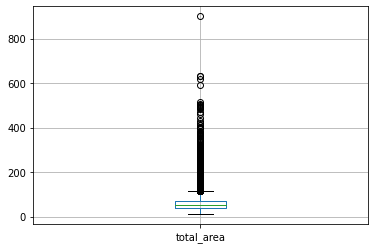

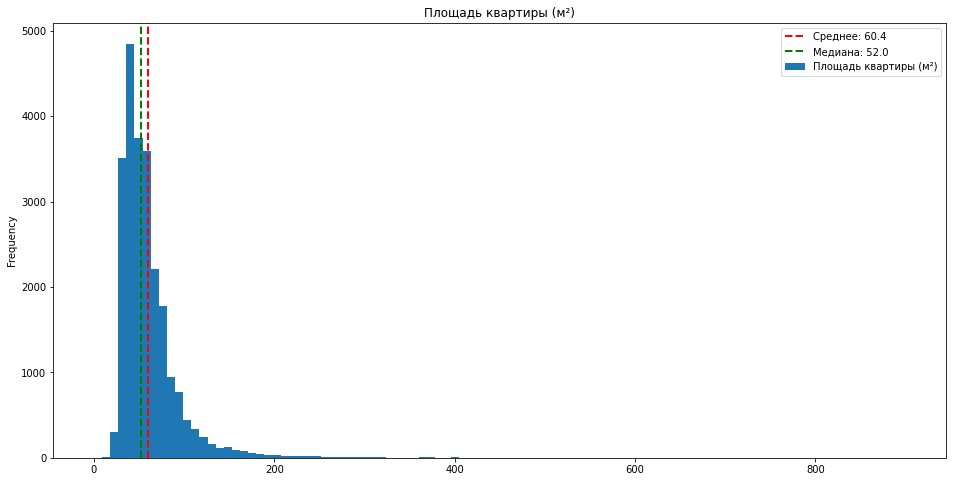

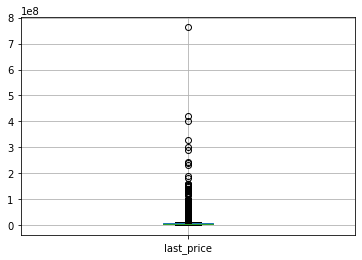

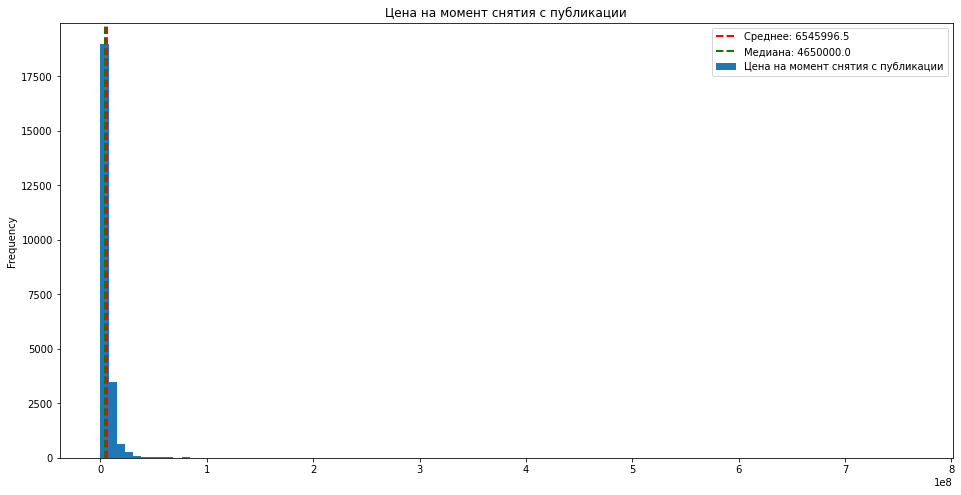

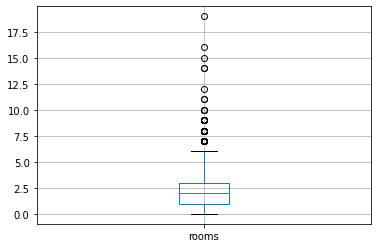

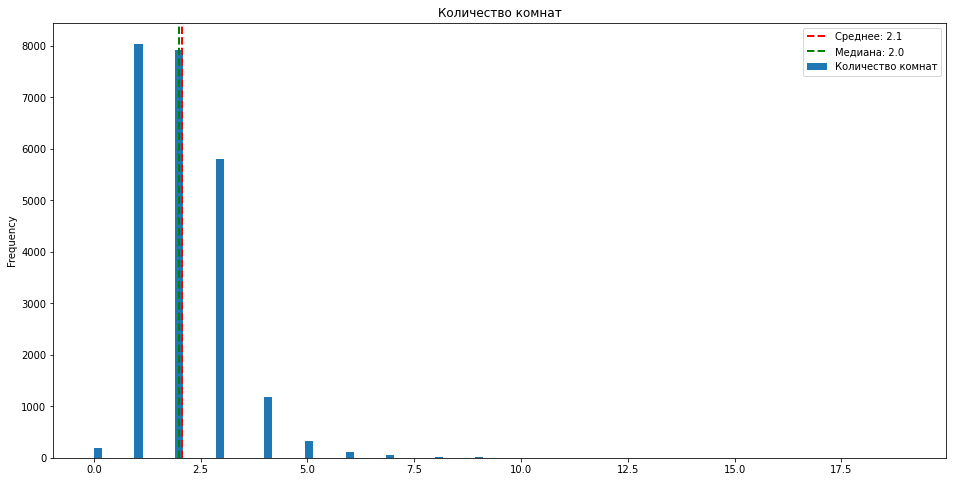

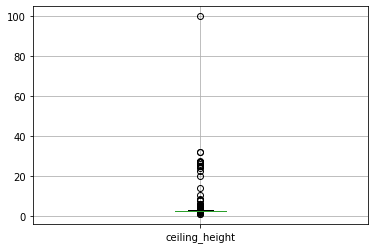

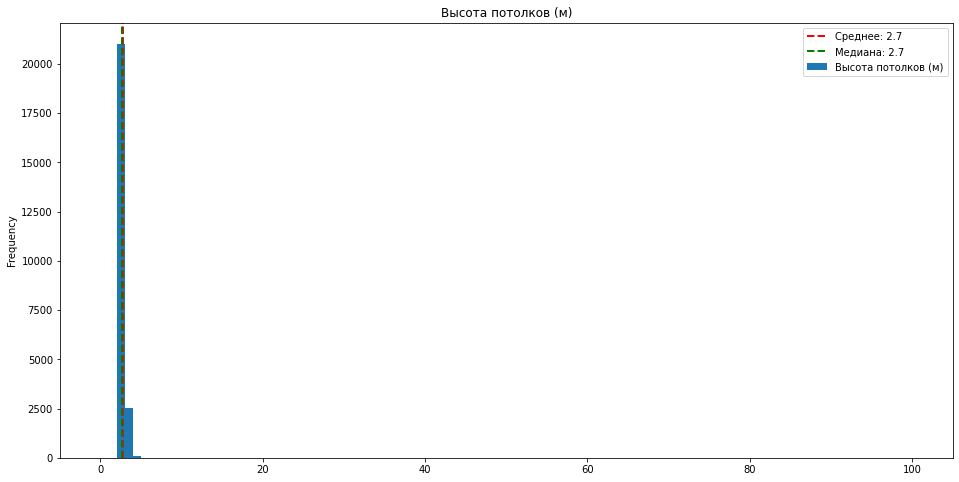

In [ ]:
for key, value in columns.items():
    df.boxplot(column=key)
    df.plot(y=key, 
            title=value, 
            kind='hist', 
            bins=100, 
            range = (0, df[key].max()), 
            figsize=(16,8), 
            label = value)
    plt.axvline(x=df[key].mean(), 
                color='r', 
                linestyle='--', 
                linewidth=2, 
                label=f'Cреднее: {df[key].mean():.1f}')
    plt.axvline(x=df[key].median(), 
                color='g', 
                linestyle='--', 
                linewidth=2,
                label=f'Медиана: {df[key].median():.1f}')
    plt.legend()
    plt.show()

Распределение квартир по площади показывает, что больше всего квартир с площадью немного меньшей медианного значения. Есть небольшре количество квартир большой площади, которые смещаю среднее значение. Оценим диапазон нормальных значений. 

In [ ]:
def get_limits(col):
    """ Функция для получения минимума и максимума нормальных значений на диаграмме размаха.
        
        Параметр: количественный столбец датафрейма.
        
        Возвращаемое значение: кортеж из минимального и максимального нормального значения.
    """
    min = col.min()
    max = col.max()
    q1 = np.percentile(col, 25)
    q3 = np.percentile(col, 75)
    iqr = 1.5*(q3 - q1)
    left = q1 - iqr
    if left < min:
        left = min
    right = q3 + iqr
    if right > max:
        right = max
    return (left, right)    

In [ ]:
total_area_min_lim, total_area_max_lim = get_limits(df['total_area'])
print(f'Оценка нормальных значений для плошади: минимум {total_area_min_lim:.1f}, максимум {total_area_max_lim:.1f}.')

Оценка нормальных значений для плошади: минимум 12.0, максимум 114.6.


In [ ]:
len(df[df['total_area'] < total_area_min_lim])

0

In [ ]:
len(df[df['total_area'] > total_area_max_lim])

1239

Квартир с большой площадью много, поэтому увеличим ограничение максимальной площади в 2 раза.

In [ ]:
total_area_max_lim *= 2
len(df[df['total_area'] > total_area_max_lim])

159

In [ ]:
df[df['total_area'] <= total_area_max_lim]['total_area'].describe()

count    23512.000000
mean        58.628078
std         27.784609
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        229.000000
Name: total_area, dtype: float64

Плошадь квартиры: минимум 12.0, максимум 229.3.


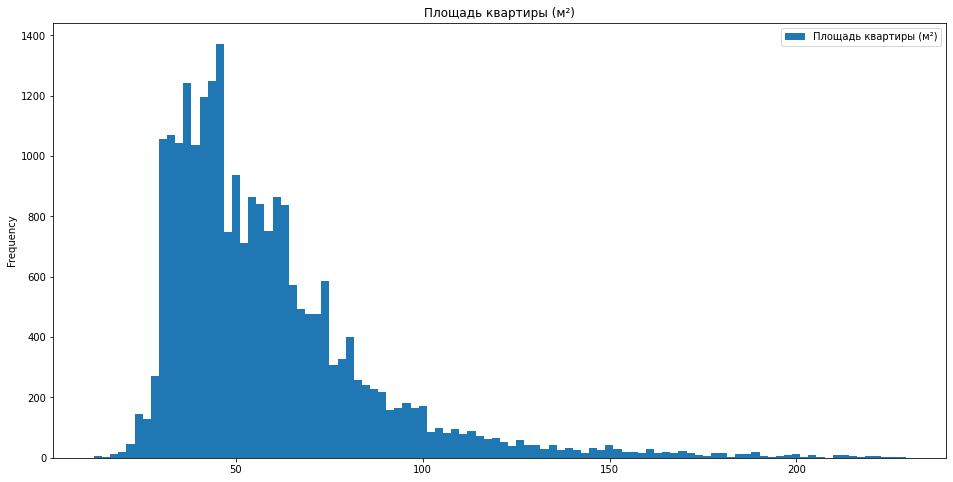

In [ ]:
print(f'Плошадь квартиры: минимум {total_area_min_lim:.1f}, максимум {total_area_max_lim:.1f}.')
key = 'total_area'
df.plot(y=key, title=columns[key], kind='hist', bins=100, range = (total_area_min_lim, total_area_max_lim), figsize=(16,8), label=columns[key]);

Оценим нормальные значения последней цены.

In [ ]:
last_price_min_lim, last_price_max_lim = get_limits(df['last_price'])
print(f'Оценка нормальных значений для цены: минимум {last_price_min_lim:.0f}, максимум {last_price_max_lim:.0f}.')

Оценка нормальных значений для цены: минимум 12190, максимум 11870000.


In [ ]:
len(df[df['last_price'] < last_price_min_lim])

0

In [ ]:
len(df[df['last_price'] > last_price_max_lim])

2064

Квартир с большой ценой много, поэтому увеличим ограничение максимальной цены в 2 раза.

In [ ]:
last_price_max_lim *= 2
len(df[df['last_price'] > last_price_max_lim])

537

In [ ]:
df[df['last_price'] <= last_price_max_lim]['last_price'].describe()

count       23134.0
mean      5547679.5
std       3503235.5
min         12190.0
25%       3400000.0
50%       4595000.0
75%       6540000.0
max      23716800.0
Name: last_price, dtype: float64

Цена: минимум 12190, максимум 23740000.


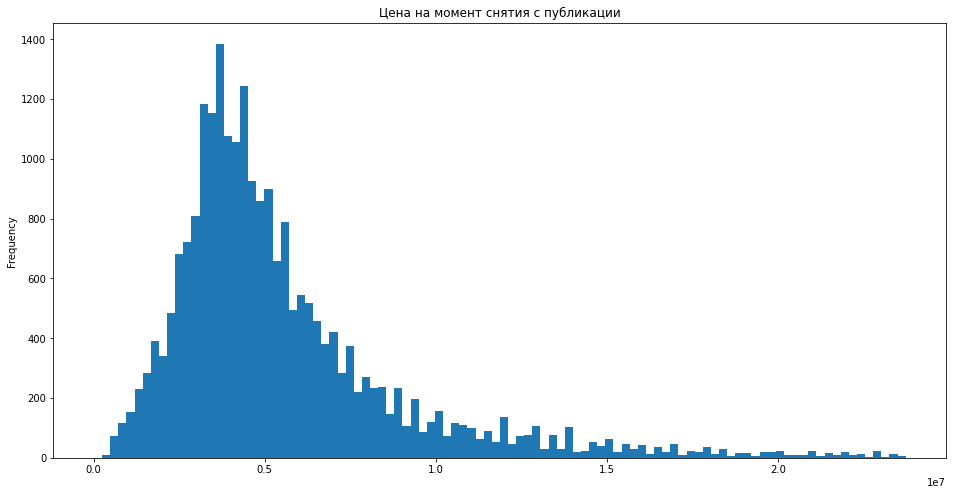

In [ ]:
print(f'Цена: минимум {last_price_min_lim:.0f}, максимум {last_price_max_lim:.0f}.')
key = 'last_price'
df.plot(y=key, title=columns[key], kind='hist', bins=100, range = (last_price_min_lim, last_price_max_lim), figsize=(16,8), xlabel=key, legend=False);


Оценим нормальные значения числа комнат.

In [ ]:
rooms_min_lim, rooms_max_lim = get_limits(df['rooms'])
print(f'Оценка нормальных значений числа комнат: минимум {rooms_min_lim}, максимум {rooms_max_lim:.0f}.')

Оценка нормальных значений числа комнат: минимум 0, максимум 6.


In [ ]:
df['rooms'].value_counts().sort_index()

0      197
1     8043
2     7927
3     5803
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

In [ ]:
len(df[df['rooms'] > rooms_max_lim])

90

Число комнат: минимум 0, максимум 6.


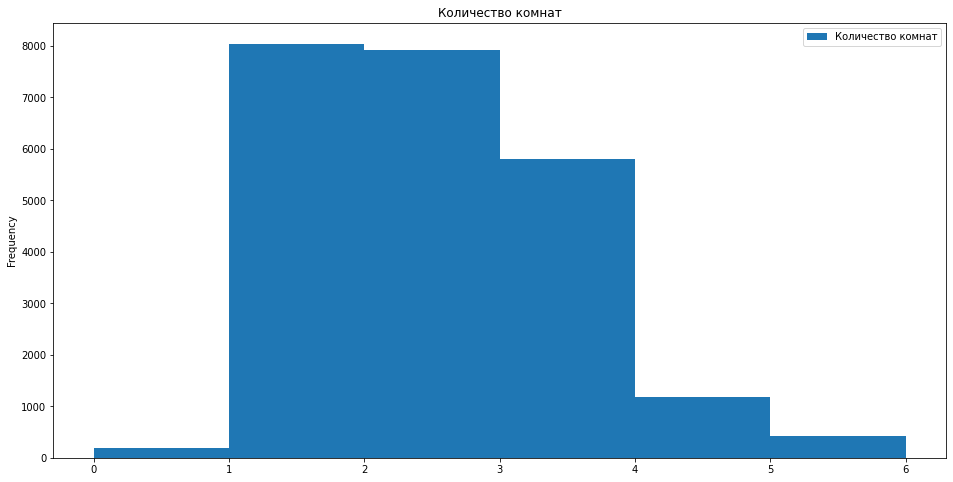

In [ ]:
print(f'Число комнат: минимум {rooms_min_lim}, максимум {rooms_max_lim:.0f}.')
key = 'rooms'
df.plot(y=key, title=columns[key], kind='hist', bins=6, range = (rooms_min_lim, rooms_max_lim), figsize=(16,8), label=columns[key]);

Оценим нормальные значения высоты потолка.

In [ ]:
ceiling_height_min_lim, ceiling_height_max_lim = get_limits(df['ceiling_height'])
print(f'Оценка нормальных значений высоты потолков: минимум {ceiling_height_min_lim:.2f}, максимум {ceiling_height_max_lim:.2f}')

Оценка нормальных значений высоты потолков: минимум 2.45, максимум 2.85


Оценим количество квартир с аномальными значениями высоты потолка

In [ ]:
len(df[df['ceiling_height'] < ceiling_height_min_lim])

43

In [ ]:
len(df[df['ceiling_height'] > ceiling_height_max_lim])

2908

Квартир с большой высотой потолков много, поэтому увеличим максимальную высоту потолков в 2 раза.

In [ ]:
ceiling_height_max_lim *= 2
len(df[df['ceiling_height'] > ceiling_height_max_lim])

31

Минимальная высота потолков 2.45 м, максимальная высота потолков 5.70 м


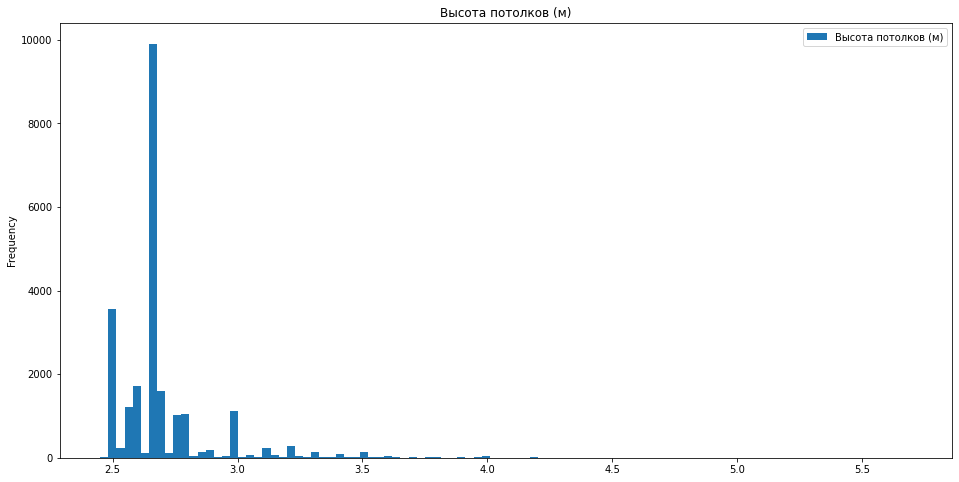

In [ ]:
print(f'Минимальная высота потолков {ceiling_height_min_lim:.2f} м, максимальная высота потолков {ceiling_height_max_lim:.2f} м')
key = 'ceiling_height'
df.plot(y=key, title=columns[key], kind='hist', bins=100, range = (ceiling_height_min_lim, ceiling_height_max_lim), figsize=(16,8), label=columns[key]);

### Время продажи квартиры

Построим гистограмму для времени продажи квартиры. Учтём, что пропущенные значения были заполнены 0.

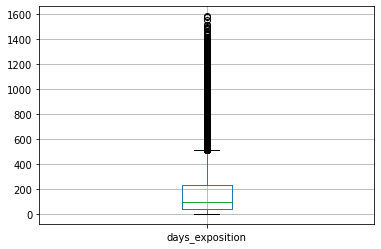

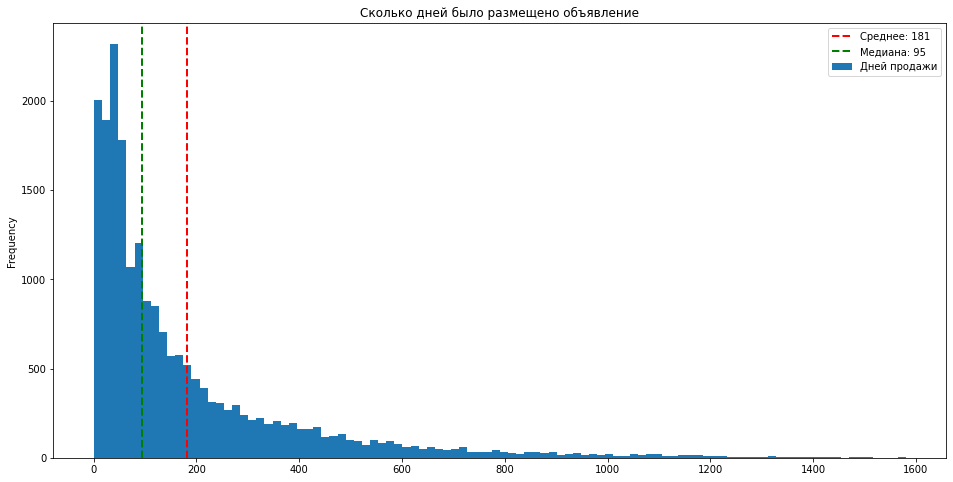

In [ ]:
key = 'days_exposition'
df_days_exposition = df[df[key] != 0]
df_days_exposition.boxplot(column=key)
df_days_exposition.plot(y=key, 
                        title='Cколько дней было размещено объявление',
                        kind='hist', 
                        bins=100, 
                        figsize=(16,8), 
                        label = 'Дней продажи')
days_exposition_mean = df_days_exposition[key].mean()
plt.axvline(x=days_exposition_mean, 
            color='r', 
            linestyle='--',
            linewidth=2, 
            label=f'Среднее: {days_exposition_mean:.0f}')
days_exposition_median = df_days_exposition[key].median()
plt.axvline(x=days_exposition_median, 
            color='g', 
            linestyle='--', 
            linewidth=2,
            label=f'Медиана: {days_exposition_median:.0f}')
plt.legend()
plt.show()

In [ ]:
df_days_exposition['days_exposition'].describe()

count    20495.000000
mean       180.915638
std        219.806635
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Оценим нормальные значеня числа дней размещения объявления

In [ ]:
days_exposition_min_lim, days_exposition_max_lim = get_limits(df_days_exposition['days_exposition'])
print(f'Оценка нормальных значений числа дней размещения объявления: минимум {days_exposition_min_lim:.0f}, максимум {days_exposition_max_lim:.0f}.')

Оценка нормальных значений числа дней размещения объявления: минимум 1, максимум 512.


Медианное значение 95 дней, среднее 181 день. Если квартира продана менее, чем за 95 дней, то можно считать, что она продана быстро. Если квартира продается больше 512 дней, то это  необычно долго. Посмотрим сколько таких квартир.

In [ ]:
len(df[df['days_exposition'] > days_exposition_max_lim])

1669

Квартир с большим сроком продажи много, поэтому увеличим максимальный срок продажи квартиры в 2 раза.

In [ ]:
days_exposition_max_lim *= 2
len(df[df['days_exposition'] > days_exposition_max_lim])

247

Число дней размещения объявления: минимум 1, максимум 1025.


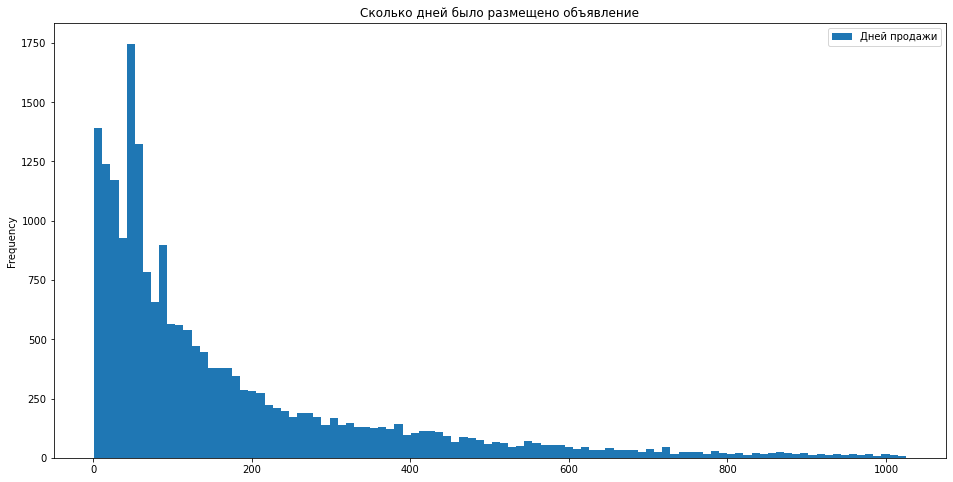

In [ ]:
print(f'Число дней размещения объявления: минимум {days_exposition_min_lim:.0f}, максимум {days_exposition_max_lim:.0f}.')
key = 'days_exposition'
df_days_exposition.plot(y=key, 
                        title='Cколько дней было размещено объявление', 
                        kind='hist', 
                        bins=100, 
                        range = (days_exposition_min_lim, days_exposition_max_lim), 
                        figsize=(16,8), 
                        label = 'Дней продажи');

### Удаление редких и выбивающихся значений

Получим срез датафрейма, который содержит строки, удовлетворяющие указанным выше ограничениям. 

In [ ]:
total_rows = len(df)
df = df.query('@total_area_min_lim <= total_area <= @total_area_max_lim and \
                    @last_price_min_lim <= last_price <= @last_price_max_lim and \
                    @rooms_min_lim <= rooms <= @rooms_max_lim and \
                    @ceiling_height_min_lim <= ceiling_height <= @ceiling_height_max_lim and\
                    days_exposition <= @days_exposition_max_lim').copy(deep=True)
print(f'Количество записей перед удалением - {total_rows}.')
print(f'Количество записей в срезе - {df.shape[0]}.')
print(f'Удалено {(total_rows - df.shape[0])/total_rows:.2%} записей.')

Количество записей перед удалением - 23671.
Количество записей в срезе - 22779.
Удалено 3.77% записей.


### Какие факторы больше всего влияют на стоимость квартиры

Для оценки зависимости цены от площади, числа комнат, удалённости от центра построим матрицу диаграмм рассеивания и рассчитаем коэффициенты корреляции.

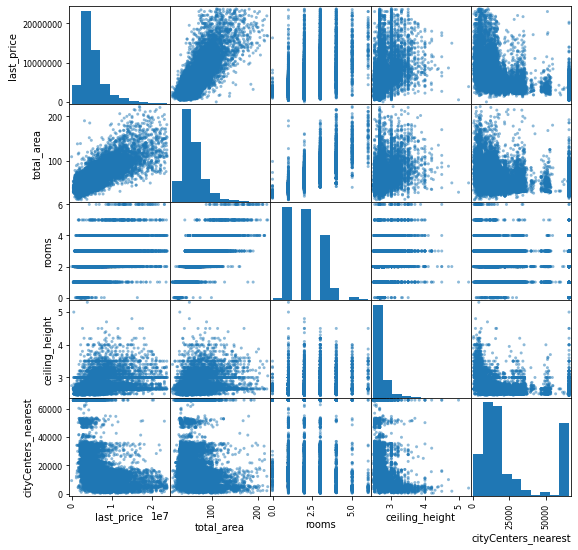

In [ ]:
pd.plotting.scatter_matrix(df[['last_price', 'total_area','rooms', 'ceiling_height', 'cityCenters_nearest']], figsize=(9, 9))
plt.show()

In [ ]:
t = df[['last_price', 'total_area','rooms', 'ceiling_height', 'cityCenters_nearest']].corr()
t

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.000000,0.783247,0.503422,0.410019,-0.474630
total_area,0.783247,1.000000,0.794087,0.354812,-0.193397
rooms,0.503422,0.794087,1.000000,0.183358,-0.109570
ceiling_height,0.410019,0.354812,0.183358,1.000000,-0.205604
cityCenters_nearest,-0.474630,-0.193397,-0.109570,-0.205604,1.000000


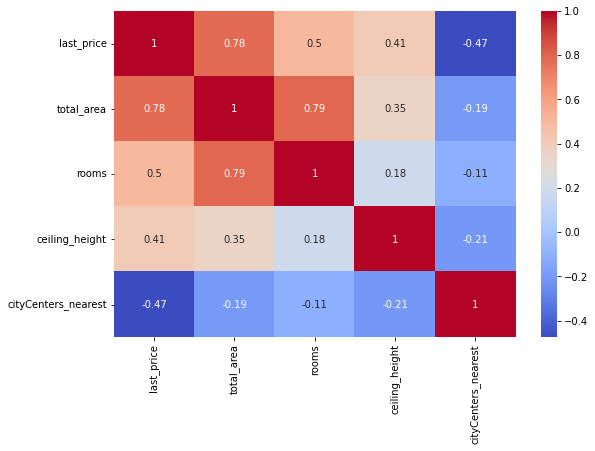

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(t,  cmap="coolwarm", annot=True)

Анализируя диаграммы рассеивания и матрицу корреляций можно сделать следующие выводы:
- между **ценой и площадью** высокий положительный коэффициент корреляции (0,78);
- коэффициент корреляции между **ценой и числом комнат** равен 0.50, что говорит о существовании зависимости между числом комнат и ценой квартиры;
- коэффициент корреляции между **ценой и высотой потолков** равен 0.41, что говорит о существовании зависимости между высотой потолков и ценой квартиры;
- коэффициент корреляции между **ценой и удалённостью от центра** отрицательный и равен -0,47. Это говорит о наличии между признаками обратной связи: чем дальше квартира от центра, тем она дешевле.

**Вывод**: больше всего на цену влияет площадь квартиры. Также есть прямая зависимость между ценой и числом комнат, ценой и высотой потолков. Между ценой и удалённостью от центра имеется обратная зависимость.  

### Зависимость цены от этажа

Сгруппируем квартиры по переменной `floor_name`.

In [ ]:
df.groupby('floor_name')['last_price'].agg(['count','mean', 'median'])

,count,mean,median
floor_name,,,
другой,16720,5733766.0,4750000.0
первый,2817,4460851.5,3900000.0
последний,3242,5240741.5,4250000.0


Построим для квартир на первом этаже гистограмму, а для остальных квартир - диаграмму рассеивания.

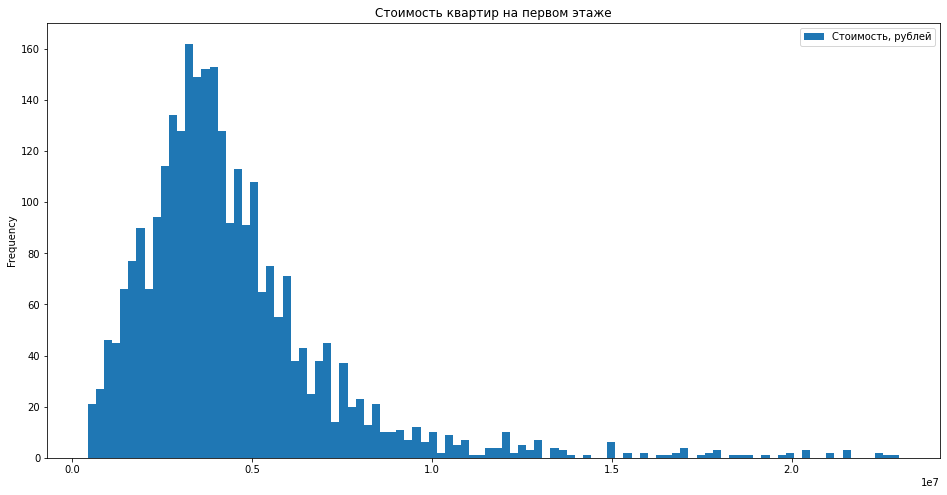

In [ ]:
df[df['floor_name'] == 'первый'].plot(y='last_price', 
                                      title='Стоимость квартир на первом этаже', 
                                      kind='hist', 
                                      bins=100, 
                                      figsize=(16,8), 
                                      label = 'Стоимость, рублей');

Большинство квартир на первом этаже имеют стоимость до 10 млн рублей.

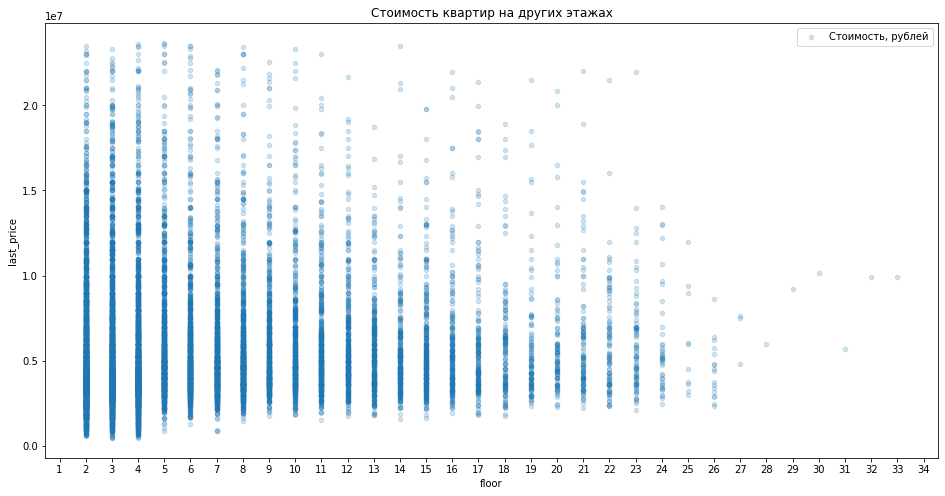

In [ ]:
ax = df[df['floor_name'] == 'другой'].plot(kind='scatter', 
                                      x='floor', 
                                      y='last_price',
                                      figsize=(16,8), 
                                      alpha=0.2,
                                      title='Стоимость квартир на других этажах', 
                                      label = 'Стоимость, рублей');
ax.set_xticks(range(1, 35));

Для "других" квартир с ростом этажа стоимость квартиры падает. Дорогие квартиры в основном расположены до 10 этажа. Дешёвые квартиры распологаются до 5 этажа.

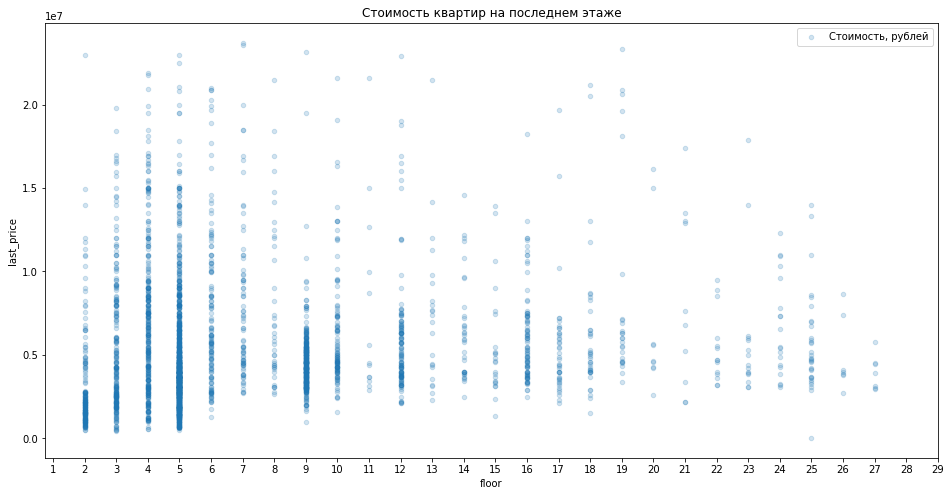

In [ ]:
ax = df[df['floor_name'] == 'последний'].plot(kind='scatter', 
                                         x='floor', 
                                         y='last_price', 
                                         figsize=(16,8), 
                                         alpha=0.2, 
                                         title='Стоимость квартир на последнем этаже', 
                                         label = 'Стоимость, рублей');
ax.set_xticks(range(1, 30));

Стоимость квартир на последнем этаже меньше стоимости "других" квартир. В основном ценятся такие квартиры, расположенные до 10 этажа. Стоимость квартир на последнем этаже в целом выше с стоимости квартир на первом этаже.

### Зависимость цены от даты размещения

Сгруппируем данные по дням недели.

In [ ]:
df.groupby('weekday')['last_price'].agg(['count','mean', 'median'])

,count,mean,median
weekday,,,
0,3469,5513520.5,4594000.0
1,4029,5560599.0,4650000.0
2,3810,5567274.5,4600000.0
3,4102,5595538.5,4550000.0
4,3859,5438772.0,4500000.0
5,1871,5318204.5,4500000.0
6,1639,5364498.5,4500000.0


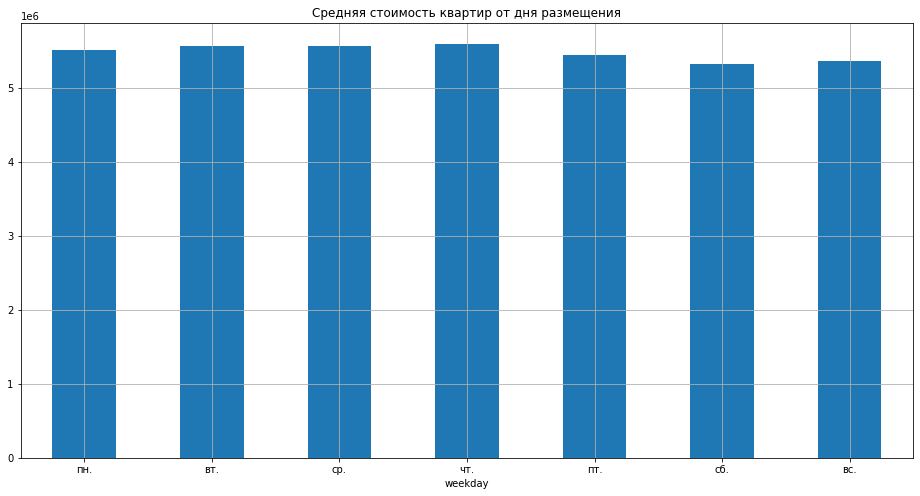

In [ ]:
days = ('пн.', 'вт.', 'ср.', 'чт.', 'пт.', 'сб.', 'вс.')
ax = df.groupby('weekday')['last_price'].mean().plot(kind='bar', 
                                                     grid=True, 
                                                     rot=0,
                                                     title='Средняя стоимость квартир от дня размещения',  
                                                     figsize=(16,8))
ax.set_xticklabels(days)
plt.show()

Можно заметить, что в пятницу, субботу и воскресенье цена немного ниже.

Сгруппируем данные по месяцам.

In [ ]:
df.groupby('month')['last_price'].agg(['count','mean', 'median'])

,count,mean,median
month,,,
1,1429,5525209.0,4540000.0
2,2541,5529548.5,4600000.0
3,2479,5489888.0,4590000.0
4,2307,5603392.5,4700000.0
5,1226,5484379.5,4500000.0
6,1698,5264705.0,4350000.0
7,1625,5523773.0,4590000.0
8,1683,5455964.0,4500000.0
9,1910,5660265.0,4600000.0


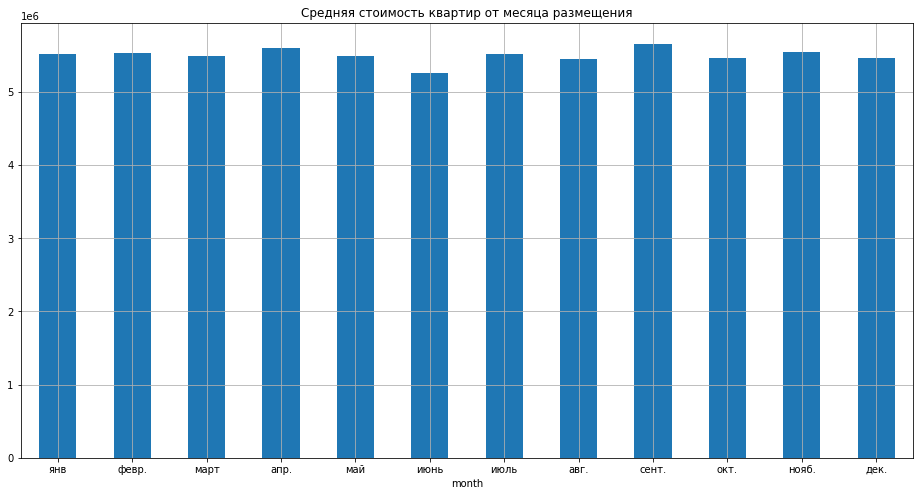

In [ ]:
months = ('янв', 'февр.', 'март', 'апр.', 'май', 'июнь', 'июль', 'авг.', 'сент.', 'окт.', 'нояб.', 'дек.')
ax = df.groupby('month')['last_price'].mean().plot(kind='bar', 
                                                   grid=True, 
                                                   rot=0,
                                                   title='Средняя стоимость квартир от месяца размещения', 
                                                   figsize=(16,8))
ax.set_xticklabels(months)
plt.show()

Наименьшие цены - летом. Также есть небольшой спад цены в конце года.

Сгруппируем данные по годам.

In [ ]:
df.groupby('year')['last_price'].agg(['count','mean', 'median'])

,count,mean,median
year,,,
2014,83,8332178.0,7100000.0
2015,956,6141906.5,5013359.5
2016,2672,5498998.0,4450000.0
2017,7940,5422547.0,4450000.0
2018,8336,5381917.5,4500000.0
2019,2792,5820208.0,5000000.0


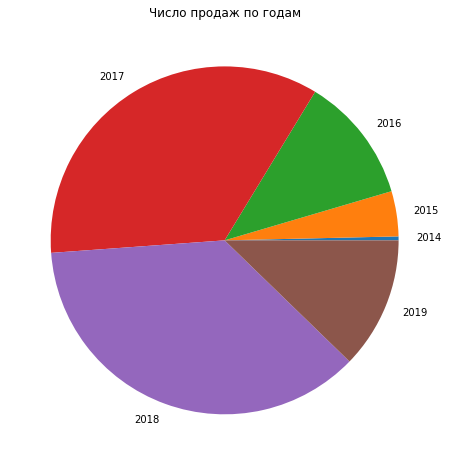

In [ ]:
df.groupby('year')['last_price'].count().plot(kind='pie', 
                                              figsize=(16,8), 
                                              title='Число продаж по годам', 
                                              label='');

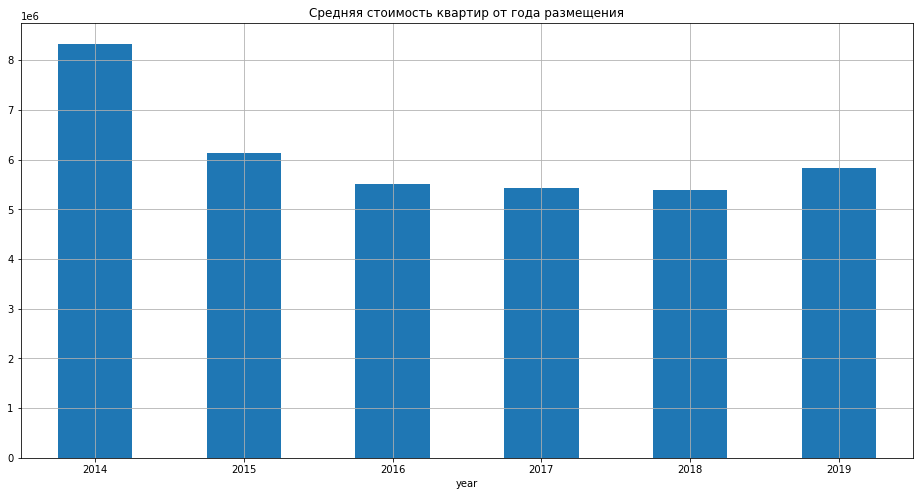

In [ ]:
df.groupby('year')['last_price'].mean().plot(kind='bar', 
                                             grid=True, 
                                             rot=0,
                                             title='Средняя стоимость квартир от года размещения', 
                                             figsize=(16,8));

Можно заметить макимум средней цены в 2014 году, что может быть связано с небольшим количеством продаж. Цены в 2016-2018 годах были меньше.

### Населённые пункты с наибольшим числом объявлений

Сгруппируем данные по признаку `locality_name`, посчитаем их количество, среднюю цену за квадратный метр и выделим 10 населённых пунктов с наибольшим числом объявлений.

In [ ]:
locality_name_count = df.groupby('locality_name').agg(
    count=('locality_name', 'count'), 
    mean_price_square_meter=('price_square_meter', 'mean'))
locality_name_count.sort_values(by='count', ascending=False, inplace = True)
top_10 = locality_name_count.iloc[:10]
top_10

,count,mean_price_square_meter
locality_name,,
Санкт-Петербург,14987,109342.117188
посёлок Мурино,551,85751.531250
посёлок Шушары,438,78587.734375
Всеволожск,394,67288.875000
Пушкин,351,101907.890625
Колпино,334,75298.843750
посёлок Парголово,325,90259.742188
Гатчина,306,68757.679688
деревня Кудрово,295,92446.375000


Выделим из них населённые пункты с самой высокой и самой инзкой стоимостью квадратного метра жилья.

In [ ]:
top_10.sort_values(by='mean_price_square_meter', ascending=False).index[0]

'Санкт-Петербург'

In [ ]:
top_10.sort_values(by='mean_price_square_meter').index[0]

'Выборг'

Самая **высокая** стоимостью квадратного метра в городе **Санкт-Петербург**, самая **низкая** - в городе **Выборг**. 

### Изучение предложения квартир в Санкт-Петербурге

* Выделим квартиры в Санкт-Петербурге
* Создадим столбец с расстоянием до центра в километрах и округлим его до целых значений.
* Посчитаем среднюю цену для каждого километра.
* Построим график средней цены от удалённости от центра.
* Определим центральную зону.

In [ ]:
df_SPb = df[df.locality_name == 'Санкт-Петербург'].copy(deep=True)
df_SPb['cityCenters_nearest_km'] = round(df_SPb['cityCenters_nearest'] / 1000)
df_SPb['cityCenters_nearest_km'].describe()

count    14987.000000
mean        11.839261
std          4.768691
min          0.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         41.000000
Name: cityCenters_nearest_km, dtype: float64

Посчитаем среднюю цену для каждого километра и построим график.

In [ ]:
cityCenters_nearest_to_price = df_SPb.groupby('cityCenters_nearest_km').agg(price_square_meter=('price_square_meter', 'mean'))
cityCenters_nearest_to_price.head(10)

,price_square_meter
cityCenters_nearest_km,
0.0,118153.218750
1.0,132123.390625
2.0,126005.750000
3.0,114027.281250
4.0,122481.554688
5.0,128288.414062
6.0,128429.968750
7.0,126991.085938
8.0,122180.601562


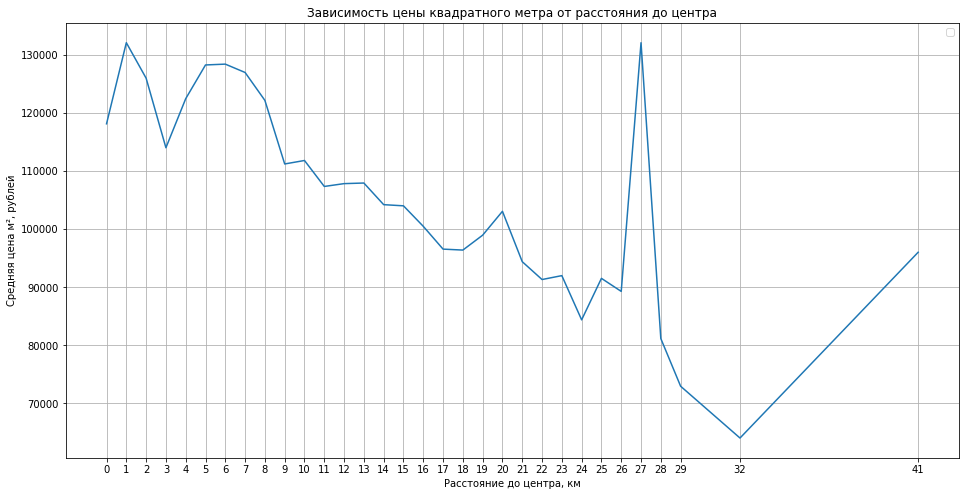

In [ ]:
cityCenters_nearest_to_price.plot(figsize=(16,8), 
                                  grid=True)
plt.title('Зависимость цены квадратного метра от расстояния до центра')
plt.xticks(cityCenters_nearest_to_price.index)
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена м², рублей')
plt.legend('')
plt.show()


Из графика видно, что начиная с 8 км средняя цена начинает резко падать.

**Вывод** радиус центра города для Санкт-Петербурга равен 8 км.

### Исследование сегмента квартир в центре

* Выделим сегмент квартир в центре. 
* Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.
* Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

#### Анализ параметров: площадь, цена, число комнат, высота потолков

In [ ]:
df_SPb_center = df_SPb[df_SPb.cityCenters_nearest_km <= 8]
df_SPb_center[['total_area','last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3561.000000,3561.0,3561.000000,3561.000000
mean,76.291824,9293028.0,2.528222,2.892168
std,32.659523,4404458.5,1.128713,0.331100
min,12.000000,1600000.0,0.000000,2.450000
25%,51.299999,6100000.0,2.000000,2.650000
50%,70.900002,8250000.0,2.000000,2.750000
75%,94.150002,11500000.0,3.000000,3.100000
max,222.000000,23684000.0,6.000000,5.300000


Для 75% квартир площадь не превышает 95 м², числом комнат не больше 3. Средняя высота потолков 2.9 м. Стоимость варьируется от 1.6 млн до 24 млн рублей.

#### Влияние на стоимость общей площади, числа комнат, высоты потолков и удалённость от центра

Для оценки влияния общей площади, числа комнат, высоты потолков и удалённость от центра на стоимость квартиры построим матрицу диаграмм рассеивания и рассчитаем коэффициенты корреляции.

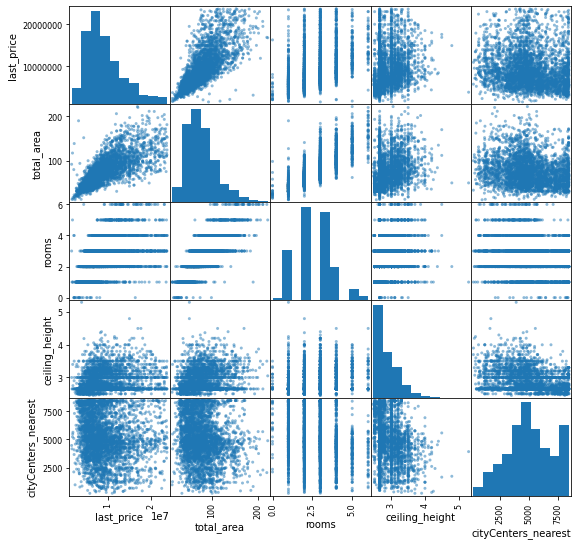

In [ ]:
pd.plotting.scatter_matrix(df_SPb_center[['last_price', 'total_area', 'rooms', 
                                          'ceiling_height', 'cityCenters_nearest']], 
                           figsize=(9, 9));

In [ ]:
t = df_SPb_center[['last_price', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest']].corr()
t

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.000000,0.746153,0.481061,0.209967,-0.137583
total_area,0.746153,1.000000,0.801256,0.266844,-0.205341
rooms,0.481061,0.801256,1.000000,0.233249,-0.229716
ceiling_height,0.209967,0.266844,0.233249,1.000000,-0.278058
cityCenters_nearest,-0.137583,-0.205341,-0.229716,-0.278058,1.000000


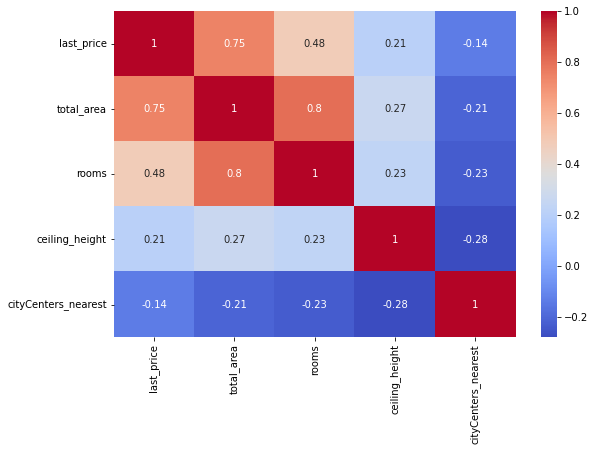

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(t,  cmap="coolwarm", annot=True);

Анализируя диаграммы рассеивания и матрицу корреляций можно сделать следующие выводы:
- между **ценой и площадью** высокий положительный коэффициент корреляции (0,75);
- коэффициент корреляции между **ценой и числом комнат** равен 0.48, что говорит о существовании зависимости между числом комнат и ценой квартиры;
- коэффициент корреляции между **ценой и высотой потолков** равен 0.21, что говорит слабой положительной зависимости между высотой потолков и ценой квартиры;
- коэффициент корреляции между **ценой и удалённостью от центра** отрицательный и равен -0,14. Это говорит о наличии очень слабой обратной связи: чем дальше квартира от центра, тем она дешевле.

**Вывод**: как и по всему датафрейму в центре Санкт-Петербурга больше всего на цену влияет площадь квартиры. Также есть прямая зависимость между ценой и числом комнат. В отличии от выводов по всем населённым пунктам для центра Санкт-Петербурга влияние высоты потолков и удалённости от центра на цену мало.  

#### Зависимость цены от этажа

In [ ]:
df_SPb_center.groupby('floor_name')['last_price'].agg(['count','mean', 'median'])

,count,mean,median
floor_name,,,
другой,2555,9614111.0,8500000.0
первый,412,7198459.0,6200000.0
последний,594,9364739.0,8375000.0


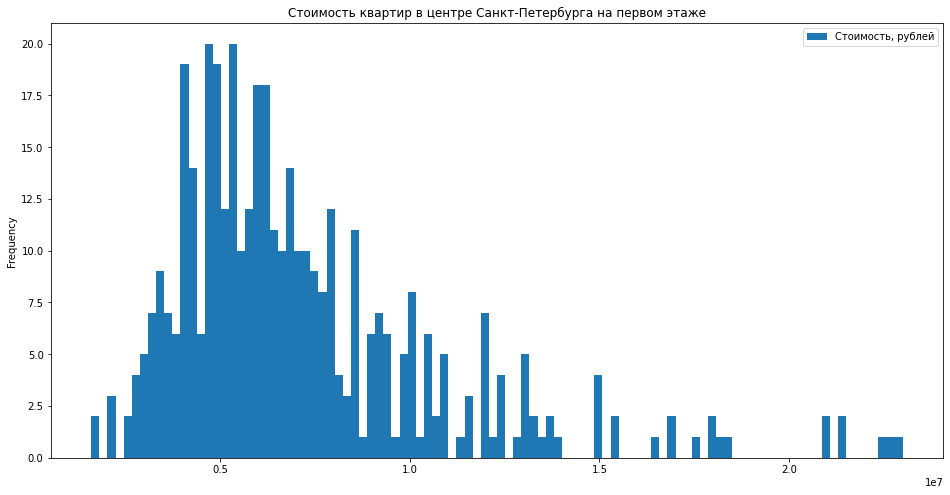

In [ ]:
df_SPb_center[df_SPb_center['floor_name'] == 'первый'].plot(y='last_price', 
                                                            title='Стоимость квартир в центре Санкт-Петербурга на первом этаже', 
                                                            kind='hist', 
                                                            bins=100,
                                                            figsize=(16,8), 
                                                            label = 'Стоимость, рублей');

В центре Санкт-Петербурга отметим больший разброс в стоимости квартир на первом этаже. 

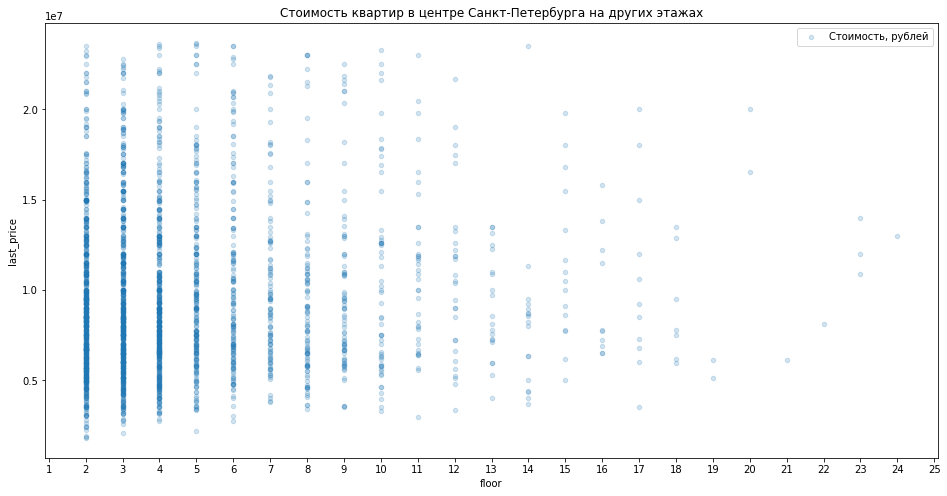

In [ ]:
ax = df_SPb_center[df_SPb_center['floor_name'] == 'другой'].plot(kind='scatter', 
                                                            x='floor', 
                                                            y='last_price',
                                                            figsize=(16,8), 
                                                            alpha=0.2,
                                                            title='Стоимость квартир в центре Санкт-Петербурга на других этажах', 
                                                            label = 'Стоимость, рублей');
ax.set_xticks(range(1, 26));

В центре  Санкт-Петербурга для "других" квартир с ростом этажа стоимость квартиры падает. Дорогие квартиры в основном расположены до 10 этажа. Дешёвые квартиры распологаются до 3 этажа.

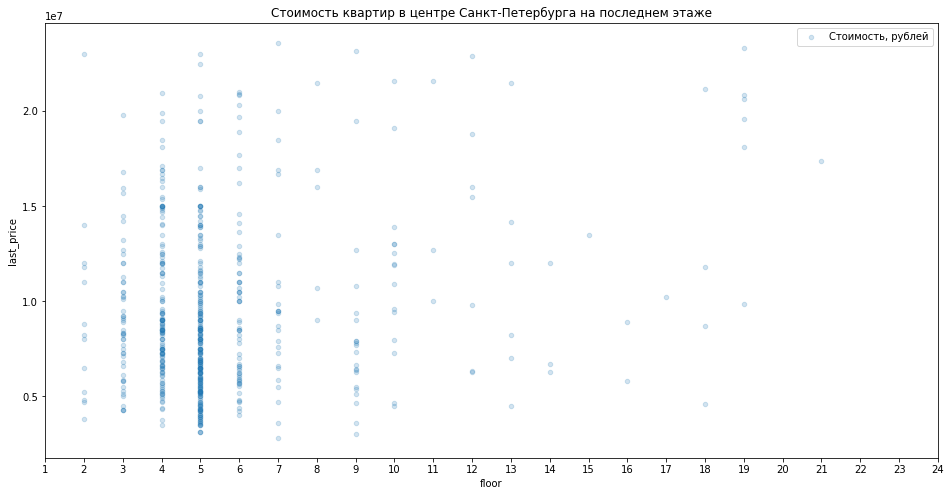

In [ ]:
ax = df_SPb_center[df_SPb_center['floor_name'] == 'последний'].plot(kind='scatter', 
                                                               x='floor', 
                                                               y='last_price', 
                                                               figsize=(16,8), 
                                                               alpha=0.2,
                                                               title='Стоимость квартир в центре Санкт-Петербурга на последнем этаже', 
                                                               label = 'Стоимость, рублей');
ax.set_xticks(range(1, 25));

В центре Санкт-Петербурга стоимость квартир на последнем этаже меньше стоимости "других" квартир. В основном ценятся такие квартиры, расположенные до 8 этажа.

#### Зависимость цены от даты размещения

Сгруппируем данные по дням недели.

In [ ]:
df_SPb_center.groupby('weekday')['last_price'].agg(['count','mean', 'median'])

,count,mean,median
weekday,,,
0,532,9601396.0,8466000.0
1,613,9190667.0,8100000.0
2,616,9382237.0,8375000.0
3,719,9357941.0,8200000.0
4,612,9138549.0,8200000.0
5,262,8670240.0,7750000.0
6,207,9557681.0,8500000.0


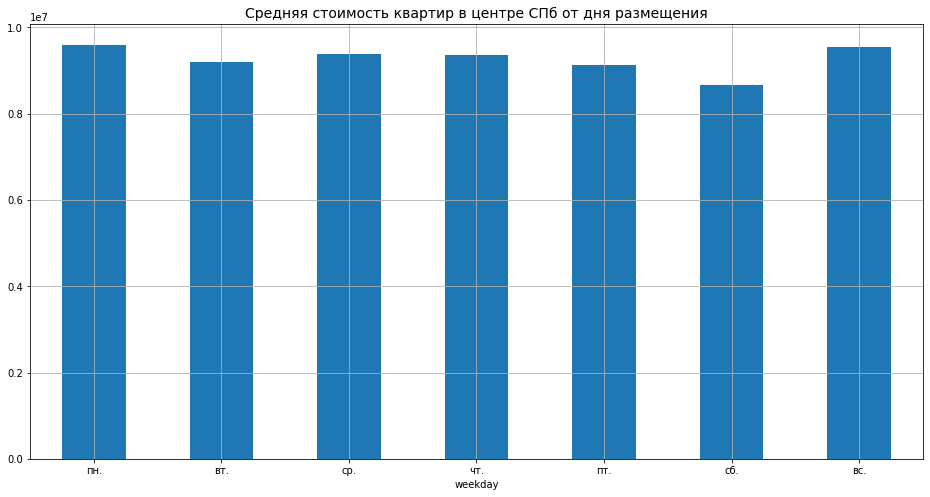

In [ ]:
ax = df_SPb_center.groupby('weekday')['last_price'].mean().plot(kind='bar', 
                                                                grid=True, 
                                                                rot=0,
                                                                figsize=(16,8))
ax.set_xticklabels(days)
ax.set_title('Средняя стоимость квартир в центре СПб от дня размещения', fontsize = 14)
plt.show()

Можно заметить, что в субботу цена немного ниже.

Сгруппируем данные по месяцам.

In [ ]:
df_SPb_center.groupby('month')['last_price'].agg(['count','mean', 'median'])

,count,mean,median
month,,,
1,216,9451023.0,8295000.0
2,375,9555761.0,8300000.0
3,380,9577500.0,8425000.0
4,343,9370083.0,8045000.0
5,210,9175382.0,8150000.0
6,279,9032115.0,8000000.0
7,285,9417253.0,8500000.0
8,265,8912241.0,7920000.0
9,324,9475965.0,8630000.0


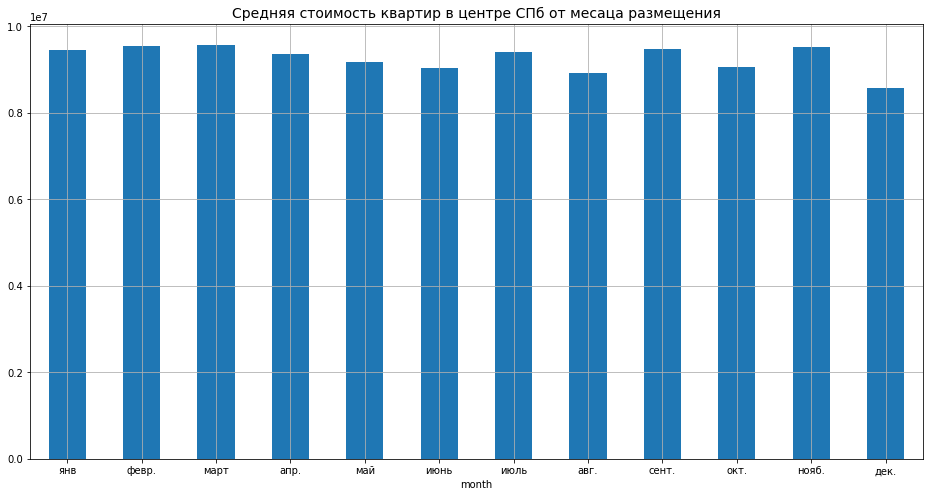

In [ ]:
ax = df_SPb_center.groupby('month')['last_price'].mean().plot(kind='bar', grid=True, rot=0, figsize=(16,8))
ax.set_xticklabels(months)
ax.set_title('Средняя стоимость квартир в центре СПб от месаца размещения', fontsize = 14)
plt.show()

Как и в целом по набору данных наименьшие цены - летом. Также есть небольшой спад цены в конце года.

Сгруппируем данные по годам.

In [ ]:
df_SPb_center.groupby('year')['last_price'].agg(['count','mean', 'median'])

,count,mean,median
year,,,
2014,18,11105090.0,9545000.0
2015,244,9395831.0,8350000.0
2016,493,9430734.0,8500000.0
2017,1279,9175576.0,8000000.0
2018,1139,9145926.0,8100000.0
2019,388,9788339.0,8400000.0


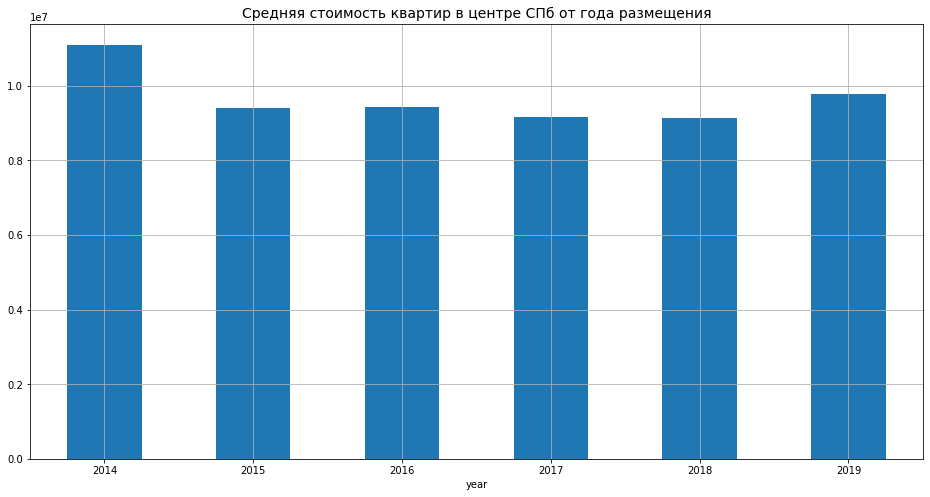

In [ ]:
ax = df_SPb_center.groupby('year')['last_price'].mean().plot(kind='bar', 
                                                             grid=True, 
                                                             rot=0, 
                                                             figsize=(16,8));
ax.set_title('Средняя стоимость квартир в центре СПб от года размещения', fontsize = 14)
plt.show()                                                             

Как и по всему набору данных для центра Санкт-Петербурга можно заметить макимум средней цены в 2014 году, что связано с небольшим количеством продаж. Также средние цены в 2017-2018 годах были меньше, что можно связать с бOльшим количеством продаж.

**Вывод.** Для центра Санкт-Петербурга ключевыми параметрами, определяющими стоимость квартиры  являются общая площадь и число комнат. Для квартир из всего набора данных также имеется положительная зависимость стоимости от высоты потолков и отрицательная зависимоть стоимости от расстояния от центра. Дата размещения (день, месяц, год) не значительно влияет на стоимость квартиры. Для центра Санкт-Петербурга есть небольшое снижение цены в субботу. Также можно заметить небольшое снижение цены летом и в конце года.

### Вывод по шагу 4

В ходе выполнения 4 шага была проведена следующая работа:
* Исследованы параметры: площадь, цена, число комнат, высота потолков. Построены диаграммы размаха и гистограммы для каждого параметра. Определены границы нормальных значений.
* Изучено время продажи квартиры, построена гистограмма. Найдено среднее значение и медиана. Определены критерии быстрых и необычно долгих продаж.
* Убраны редкие и выбивающиеся значения (корректные данные скопированы в отдельный датафрейм).
* Изучена зависимость цены от площади, числа комнат, удалённости от центра. Также исследована зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Изучена зависимость от даты размещения: дня недели, месяца и года.
* Отобраны 10 населённых пунктов с наибольшим числом объявлений. Найдена средняя цена квадратного метра в этих населённых пунктах. Среди них выделены населённые пункты с самой высокой и низкой стоимостью жилья.
* В отдельный датафрейм выделены квартиры в Санкт-Петербурге. Определёна граница центра города.
* Выделен сегмент квартир в центре. Для этой территорию изучены следующие параметры: площадь, цена, число комнат, высота потолков. Выделены факторы, которые влияют на стоимость квартиры. Проведено их сравнение с выводами по всему датафрейму.

## Шаг 5. Общий вывод

Исследуемый набор данных содержит 23699 строк. Всего в таблице 22 столбца.Из них: 2 столбца имеют логический тип, 3 столбца - целочисленный, 14 столбцов - вещественный и 3 столбца - строковый. В ходе выполнения проекта была проведена следующая работа:
* На этапе предобработки данных заполнили пропуски: 
  * в `ceiling_height` - медианным значением;
  * в `floors_total` - значениями из `floor`;
  * в `living_area` и `kitchen_area` на основе значений в `total_area` (квартиры свободной планировки и студии рассмотрены отдельно);
  * в `is_apartment` на `False` (не апартаменты);
  * в `balcony` нулями (нет балконов);
  * в `locality_name` - модой. Также проведена замена синонимов;
  * в `airports_nearest` - максимальным значением. Аномальное нулевое значение заменено  медианой;
  * в `cityCenters_nearest` - средним значением для данного населённого пункта. Оставшиеся пропуски - максимумом;
  * переменные `parks_around3000` и `parks_nearest` обрабатывались совместно. Пропуски в  пропуски в `parks_around3000` заполнили нулём, а в `parks_nearest` - большим значением;
  * пропуски в переменных `ponds_around3000` и `ponds_nearest` обрабатывались аналогично `parks_around3000` и `parks_nearest`;
  * в `days_exposition` пропуски заполнили  маркером - нулём.
* Оптимизированы типы переменных, что позволило уменьшить размер датафрейма на 64%.
* В таблицу добавлены: цена квадратного метра; день недели, месяц и год публикации объявления; название этажа квартиры; соотношение жилой и общей площади, а также отношение площади кухни к общей.
* Для площади, цены, число комнат и высоты потолков построены диаграммы размаха и гистограммы. С их помощью определены границы нормальных значений.
*  Исследование времени продажи квартиры показало, что если квартира продана менее чем за 95 дней, то можно считать, что она продана быстро. Если квартира продается больше 512 дней, то это необычно долго.
* Для удаления редких и выбивающиеся значений использованы ранее определённые границы нормальных значений. Всего удалено 3.8% записей.
* При определении факторов, которые больше всего влияют на цену, установлено, что главным является площадь квартиры. Также есть прямая зависимость между ценой и числом комнат, ценой и высотой потолков. Между ценой и удалённостью от центра имеется обратная зависимость.
* Наименьшей стоимостью обладают квартиры на первом этаже. Для квартир на промежуточных этажах обычно с ростом этажа стоимость дорогих квартир падает, они в основном расположены до 10 этажа. Недорогие квартиры имеются до 5 этажа. Стоимость квартир на последнем этаже ниже стоимости квартир на промежуточных этажах, но больше стоимости квартир на первом этаже.
* Зависимость стоимости от даты размещения слабая.  Для квартир размещённых в пятницу, субботу и воскресенье цена немного ниже. Наименьшие цены - летом. Также есть небольшой спад цены в конце года. В 2016-2018 годах цены были меньше. Для 2014 года характерно малое количество продаж.
* Среди десяти населённых пунктов с наибольшим числом объявлений самое дорогое жильё в городе Санкт-Петербург, а самое дешёвое - в городе  Выборг.
* Для Санкт-Петербурга радиус центра города равен 8 км. В центре для 75% квартир площадь не превышает 95 м², числом комнат не больше 3. Средняя высота потолков 2.9 м. Стоимость варьируется от 1.6 млн до 24 млн рублей.
* Как и по всему городу, в центре Санкт-Петербурга больше всего на цену влияет площадь квартиры. Также есть прямая зависимость между ценой и числом комнат. Отметим, что для центра Санкт-Петербурга влияние высоты потолков и удалённости от центра на цену мало.
* В центре разброс в стоимости квартир на первом этаже больше, чем по всему городу. Максимальная стоимость квартир на промежуточных этажах с ростом этажа падает. Как и в целом по городу, дорогие квартиры в основном расположены до 10 этажа. Недорогие квартиры распологаются до 3 этажа. Среди квартир на последнем этаже, в основном ценятся квартиры, которые расположенные до 8 этажа.
* Для квартир в центре города дата размещения также слабо влияет на стоимость. Есть небольшое снижение цены в субботу. Как и по всему городу, можно заметить снижение цены летом и в конце года. Средние цены в 2017-2018 годах были меньше, что можно связать с бOльшим количеством продаж.